In [11]:
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
import numpy as np
from numpy.random import randn
from numpy.linalg import inv
import matplotlib.pyplot as plt
from pylab import rcParams
rs = np.random.RandomState(42)
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('gs://normal-gas-turbine/PROBLEM.csv')

In [13]:
df.head()

,Date,Lube Oil Tank Level,Lube Oil Press,Lube Oil Tank Press,Lube Oil Temp,T5 Avg Turbine Temp,Disp Brg1X Overall,Disp Brg1Y Overall,Disp Brg1Z Overall,Disp Brg2Z Overall,Disp Brg2X Overall,Disp Brg2Y Overall,Disp Brg3X Overall,Disp Brg3Y Overall,Vib Gen NDE Vel Overall,Vib Gen DE Vel Overall,Vib GB Accel Overall,Gen DE Bearing Temp.,Gen NDE Bearing Temp.,GTB_GEN_AI_ACTPWR.PV
0,2018-12-06,3317.317383,2.438585,-4.176273,58.525421,604.542419,35.093742,35.811127,14.261432,18.099644,48.977833,48.960232,40.259354,38.507614,1.161269,0.763642,4.961982,83.497368,74.598305,8089.313477
1,2018-12-06,3317.539063,2.437522,-4.118880,58.298618,605.182190,35.088249,35.908443,14.046420,18.134567,49.439205,49.423702,41.319843,40.255981,1.184395,0.747677,5.049265,83.299004,74.299232,8092.416504
2,2018-12-06,3317.690918,2.366737,-4.098931,58.226234,604.551086,35.674236,36.179970,14.151123,17.997332,50.194649,50.105507,39.950085,37.876778,1.176585,0.736787,5.142735,83.169960,74.299232,8080.552734
3,2018-12-06,3317.883789,2.398437,-4.177395,58.127243,603.985229,36.673313,35.452003,13.916983,17.817667,49.828182,49.814228,40.828110,39.098167,1.167820,0.749948,5.090524,82.999924,74.097809,8095.994629
4,2018-12-06,3317.982666,2.432960,-4.170672,58.197910,604.144043,37.552101,36.847149,13.959758,17.591482,50.893021,50.815502,44.784771,39.847897,1.170566,0.723926,5.049978,82.999924,74.097809,8131.975098


In [14]:
df.dtypes

Date                        object
Lube Oil Tank Level        float64
Lube Oil Press             float64
Lube Oil Tank Press        float64
Lube Oil Temp              float64
T5 Avg Turbine Temp        float64
Disp Brg1X Overall         float64
Disp Brg1Y Overall         float64
Disp Brg1Z Overall         float64
Disp Brg2Z Overall         float64
Disp Brg2X Overall         float64
Disp Brg2Y Overall         float64
Disp Brg3X Overall         float64
Disp Brg3Y Overall         float64
Vib Gen NDE Vel Overall    float64
Vib Gen DE Vel Overall     float64
Vib GB Accel Overall       float64
Gen DE Bearing Temp.       float64
Gen NDE Bearing Temp.      float64
GTB_GEN_AI_ACTPWR.PV       float64
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                       datetime64[ns]
Lube Oil Tank Level               float64
Lube Oil Press                    float64
Lube Oil Tank Press               float64
Lube Oil Temp                     float64
T5 Avg Turbine Temp               float64
Disp Brg1X Overall                float64
Disp Brg1Y Overall                float64
Disp Brg1Z Overall                float64
Disp Brg2Z Overall                float64
Disp Brg2X Overall                float64
Disp Brg2Y Overall                float64
Disp Brg3X Overall                float64
Disp Brg3Y Overall                float64
Vib Gen NDE Vel Overall           float64
Vib Gen DE Vel Overall            float64
Vib GB Accel Overall              float64
Gen DE Bearing Temp.              float64
Gen NDE Bearing Temp.             float64
GTB_GEN_AI_ACTPWR.PV              float64
dtype: object

In [16]:
df['Date'].dt.year.head()
df = df.set_index('Date')
df.head()

,Lube Oil Tank Level,Lube Oil Press,Lube Oil Tank Press,Lube Oil Temp,T5 Avg Turbine Temp,Disp Brg1X Overall,Disp Brg1Y Overall,Disp Brg1Z Overall,Disp Brg2Z Overall,Disp Brg2X Overall,Disp Brg2Y Overall,Disp Brg3X Overall,Disp Brg3Y Overall,Vib Gen NDE Vel Overall,Vib Gen DE Vel Overall,Vib GB Accel Overall,Gen DE Bearing Temp.,Gen NDE Bearing Temp.,GTB_GEN_AI_ACTPWR.PV
Date,,,,,,,,,,,,,,,,,,,
2018-12-06,3317.317383,2.438585,-4.176273,58.525421,604.542419,35.093742,35.811127,14.261432,18.099644,48.977833,48.960232,40.259354,38.507614,1.161269,0.763642,4.961982,83.497368,74.598305,8089.313477
2018-12-06,3317.539063,2.437522,-4.118880,58.298618,605.182190,35.088249,35.908443,14.046420,18.134567,49.439205,49.423702,41.319843,40.255981,1.184395,0.747677,5.049265,83.299004,74.299232,8092.416504
2018-12-06,3317.690918,2.366737,-4.098931,58.226234,604.551086,35.674236,36.179970,14.151123,17.997332,50.194649,50.105507,39.950085,37.876778,1.176585,0.736787,5.142735,83.169960,74.299232,8080.552734
2018-12-06,3317.883789,2.398437,-4.177395,58.127243,603.985229,36.673313,35.452003,13.916983,17.817667,49.828182,49.814228,40.828110,39.098167,1.167820,0.749948,5.090524,82.999924,74.097809,8095.994629
2018-12-06,3317.982666,2.432960,-4.170672,58.197910,604.144043,37.552101,36.847149,13.959758,17.591482,50.893021,50.815502,44.784771,39.847897,1.170566,0.723926,5.049978,82.999924,74.097809,8131.975098


In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 10,9

In [18]:
df.shape

(4895, 19)

<AxesSubplot:title={'center':'Gas Turbine_Problem'}, xlabel='Date', ylabel='T5 Avg Turbine Temperature'>

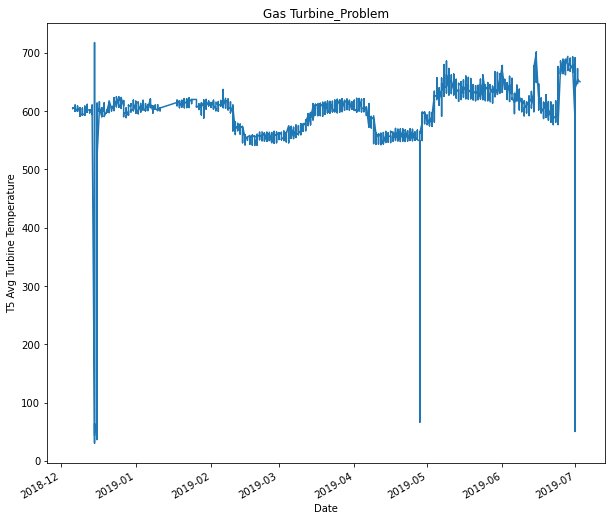

In [24]:
df2 = df.sample (n= 4895, random_state = 25, axis = 0)

plt.xlabel('Date')
plt.ylabel('T5 Avg Turbine Temperature')
plt.title('Gas Turbine_Problem')

df2['T5 Avg Turbine Temp'].plot()

<AxesSubplot:title={'center':'Gas Turbine_Problem'}, xlabel='Date', ylabel='Vib Gen NDE Vel Overall'>

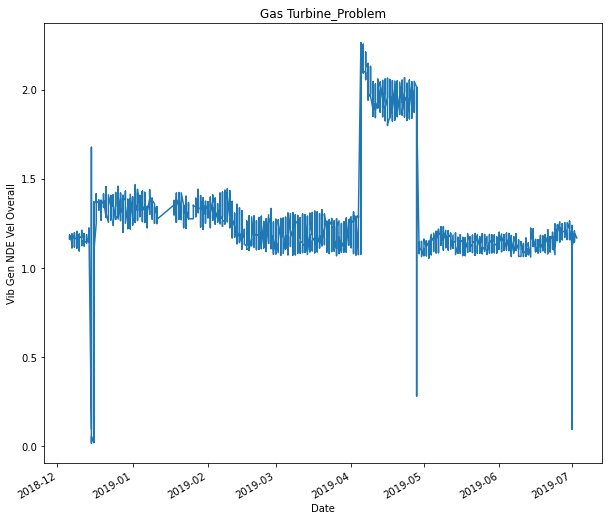

In [33]:
df2 = df.sample (n= 4895, random_state = 25, axis = 0)

plt.xlabel('Date')
plt.ylabel('Vib Gen NDE Vel Overall')
plt.title('Gas Turbine_Problem')

df2['Vib Gen NDE Vel Overall'].plot()

<AxesSubplot:title={'center':'Gas Turbine_Problem'}, xlabel='Date', ylabel='Vib Gen DE Vel Overall'>

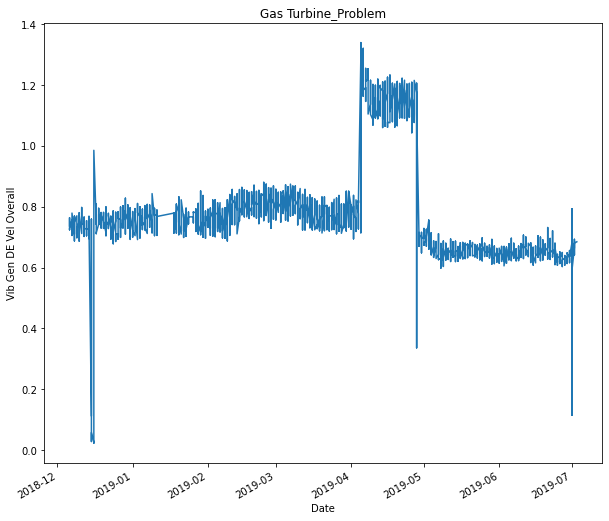

In [34]:
df2 = df.sample (n= 4895, random_state = 25, axis = 0)

plt.xlabel('Date')
plt.ylabel('Vib Gen DE Vel Overall')
plt.title('Gas Turbine_Problem')

df2['Vib Gen DE Vel Overall'].plot()

<AxesSubplot:title={'center':'Gas Turbine_Problem'}, xlabel='Date', ylabel='Vib GB Accel Overall'>

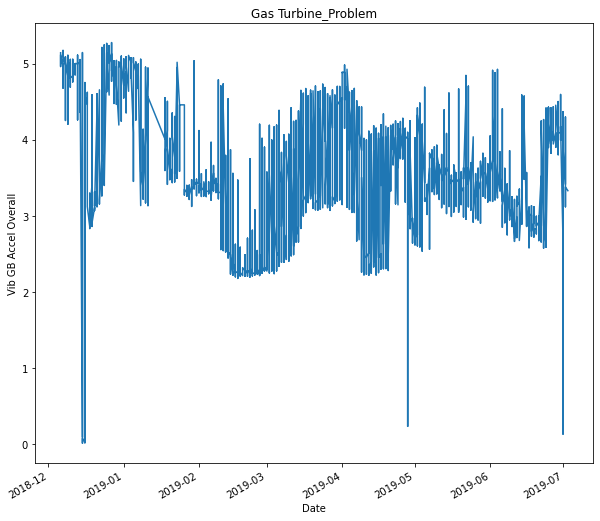

In [35]:
df2 = df.sample (n= 4895, random_state = 25, axis = 0)

plt.xlabel('Date')
plt.ylabel('Vib GB Accel Overall')
plt.title('Gas Turbine_Problem')

df2['Vib GB Accel Overall'].plot()

<AxesSubplot:title={'center':'Gas Turbine_Problem'}, xlabel='Date', ylabel='Gen DE Bearing Temp.'>

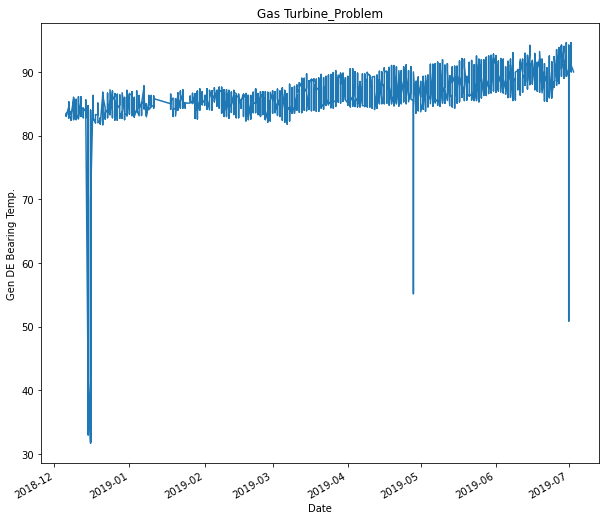

In [36]:
df2 = df.sample (n= 4895, random_state = 25, axis = 0)

plt.xlabel('Date')
plt.ylabel('Gen DE Bearing Temp.')
plt.title('Gas Turbine_Problem')

df2['Gen DE Bearing Temp.'].plot()

<AxesSubplot:title={'center':'Gas Turbine_Problem'}, xlabel='Date', ylabel='Gen NDE Bearing Temp.'>

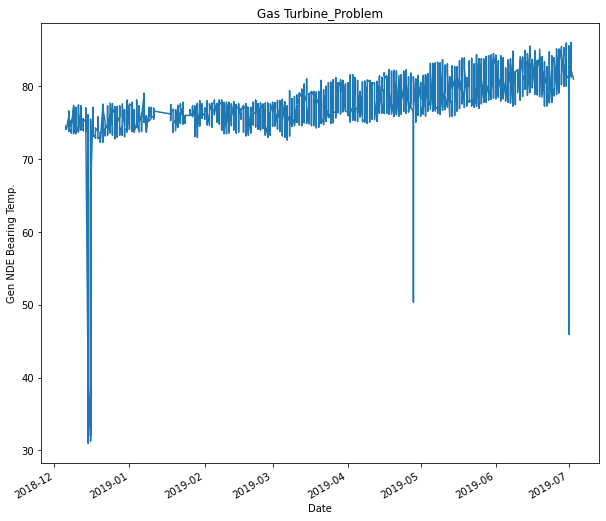

In [37]:
df2 = df.sample (n= 4895, random_state = 25, axis = 0)

plt.xlabel('Date')
plt.ylabel('Gen NDE Bearing Temp.')
plt.title('Gas Turbine_Problem')

df2['Gen NDE Bearing Temp.'].plot()

In [39]:
df.describe()

,Lube Oil Tank Level,Lube Oil Press,Lube Oil Tank Press,Lube Oil Temp,T5 Avg Turbine Temp,Disp Brg1X Overall,Disp Brg1Y Overall,Disp Brg1Z Overall,Disp Brg2Z Overall,Disp Brg2X Overall,Disp Brg2Y Overall,Disp Brg3X Overall,Disp Brg3Y Overall,Vib Gen NDE Vel Overall,Vib Gen DE Vel Overall,Vib GB Accel Overall,Gen DE Bearing Temp.,Gen NDE Bearing Temp.,GTB_GEN_AI_ACTPWR.PV
count,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000
mean,3250.204355,2.398379,-4.191758,63.403521,599.731891,23.734420,22.208568,11.662419,16.150955,35.790040,35.773579,28.182143,25.811634,1.292696,0.771876,3.544816,86.426777,77.654739,7574.988610
std,54.030457,0.151595,0.289066,4.444752,54.478605,3.468257,3.323599,15.911971,16.122748,4.139587,4.138419,3.472196,3.446901,0.275164,0.158811,0.832899,4.557200,4.279608,1154.650244
min,3101.334961,0.113985,-17.953156,31.998169,30.318428,0.601646,0.633669,-224.377228,-223.122192,0.946730,0.919602,0.627628,0.590909,0.018000,0.023301,0.016415,31.699093,30.997177,-22.713707
25%,3217.120361,2.383461,-4.251102,60.746572,576.322784,22.321497,20.760983,7.822352,13.219137,34.415623,34.397869,27.057014,24.734709,1.145876,0.664866,3.051481,84.797440,75.927708,6830.387207
50%,3258.592529,2.407855,-4.196846,62.598610,605.250000,23.455482,21.694904,12.778404,17.072800,35.569061,35.550922,28.004576,25.608786,1.202888,0.749451,3.452940,86.198212,77.299156,7774.456055
75%,3297.591797,2.434597,-4.132162,66.297401,619.688721,24.738070,22.818133,15.303426,20.313959,36.754280,36.736237,28.942356,26.458841,1.328771,0.797361,4.113804,88.499275,79.798584,8220.606445
max,3577.996582,2.519038,-0.120165,75.498589,717.181885,39.044724,37.920723,29.135336,34.904118,51.925632,51.891148,44.784771,40.921497,2.263976,1.338871,5.276006,94.599831,85.999847,10009.059570


<AxesSubplot:xlabel='Date'>

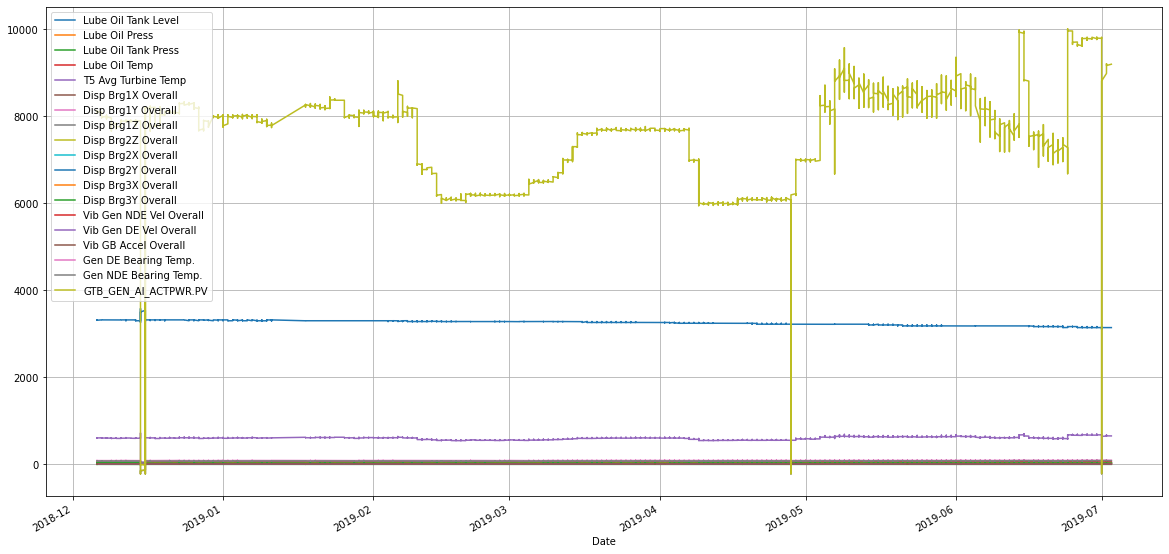

In [40]:
%matplotlib inline
rcParams['figure.figsize'] = 20,10
df.plot(grid='on')